# TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [44]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [45]:
#Looping through multiple pages
def get_soup(url):
    r = requests.get(url,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [46]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [47]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Samsung-Galaxy-Ultra-Green-Storage/dp/B0BT9CXXXX/ref=sr_1_1_sspa?crid=162SEXMCWJGMG&keywords=samsung+s23+ultra+5g&qid=1680609180&sprefix=samsung%2Caps%2C386&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\Anup sharma\AppData\Local\Temp\ipykernel_5364\1309506063.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [73]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,product,date,title,rating,body
0,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 8 March 2023,True flagship performance and excellent overal...,4.0,The media could not be loaded.\n ...
1,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 1 April 2023,Value for money,4.0,Best picture qualityFast charging missing\nRea...
2,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 13 March 2023,I like it.. but not love it.,4.0,I bought it a week ago.. i upgraded from my o...
3,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 28 February 2023,The perfect beast,5.0,This phone is a pefect upgrade from my old One...
4,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 19 March 2023,Best compact phone with all premium features,4.0,"Phone does the job, with all the features work..."
...,...,...,...,...,...
299,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 28 February 2023,The perfect beast,5.0,This phone is a pefect upgrade from my old One...
300,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 19 March 2023,Best compact phone with all premium features,4.0,"Phone does the job, with all the features work..."
301,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 24 March 2023,"Product was good, but amazon service was wors...",4.0,"Product was good, but amazon service was wors..."
302,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 7 March 2023,Awesome 😎,4.0,"Pros: excellent look and feel , I've always wa..."


In [74]:
df.to_csv("Amazon_Reviews.csv")

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
reviews=pd.read_csv("Amazon_Reviews.csv")
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,product,date,title,rating,body
0,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 8 March 2023,True flagship performance and excellent overal...,4.0,The media could not be loaded.\n ...
1,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 1 April 2023,Value for money,4.0,Best picture qualityFast charging missing\nRea...
2,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 13 March 2023,I like it.. but not love it.,4.0,I bought it a week ago.. i upgraded from my o...
3,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 28 February 2023,The perfect beast,5.0,This phone is a pefect upgrade from my old One...
4,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 19 March 2023,Best compact phone with all premium features,4.0,"Phone does the job, with all the features work..."
...,...,...,...,...,...
299,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 28 February 2023,The perfect beast,5.0,This phone is a pefect upgrade from my old One...
300,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 19 March 2023,Best compact phone with all premium features,4.0,"Phone does the job, with all the features work..."
301,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 24 March 2023,"Product was good, but amazon service was wors...",4.0,"Product was good, but amazon service was wors..."
302,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 7 March 2023,Awesome 😎,4.0,"Pros: excellent look and feel , I've always wa..."


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  304 non-null    object 
 1   date     304 non-null    object 
 2   title    304 non-null    object 
 3   rating   304 non-null    float64
 4   body     304 non-null    object 
dtypes: float64(1), object(4)
memory usage: 12.0+ KB


In [4]:
#Cleaning up the Dates and making a seperate columns for country
reviews.date = reviews.date.apply(lambda x : x.replace('Reviewed in ',''))
reviews.date = reviews.date.apply(lambda x : re.sub(r"on ", "", x))

# for Country
reviews["country"] = reviews.date.apply(lambda x : x.split(' ',1)[0])

#splitting date
reviews.date = reviews.date.apply(lambda x : x.split(' ',1)[1])

In [6]:
reviews1 = reviews.copy() #we do not need content and name so we can remove it
reviews1=reviews1.drop(['product','body'],axis=1)
reviews1 #We can perform 

,date,title,rating,country
0,🇮🇳 8 March 2023,True flagship performance and excellent overal...,4.0,India
1,🇮🇳 1 April 2023,Value for money,4.0,India
2,🇮🇳 13 March 2023,I like it.. but not love it.,4.0,India
3,🇮🇳 28 February 2023,The perfect beast,5.0,India
4,🇮🇳 19 March 2023,Best compact phone with all premium features,4.0,India
...,...,...,...,...
299,🇮🇳 28 February 2023,The perfect beast,5.0,India
300,🇮🇳 19 March 2023,Best compact phone with all premium features,4.0,India
301,🇮🇳 24 March 2023,"Product was good, but amazon service was wors...",4.0,India
302,🇮🇳 7 March 2023,Awesome 😎,4.0,India


# Remove StopWords

In [7]:
reviews1.title = reviews1.title.apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
reviews1.head() #No need to perform stemming or lematization as titles are almost small and short

,date,title,rating,country
0,🇮🇳 8 March 2023,True flagship performance excellent overall (h...,4.0,India
1,🇮🇳 1 April 2023,Value money,4.0,India
2,🇮🇳 13 March 2023,I it.. love it.,4.0,India
3,🇮🇳 28 February 2023,The perfect beast,5.0,India
4,🇮🇳 19 March 2023,Best compact phone premium features,4.0,India


# Product Sentiment Values

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Anup
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentialz = SentimentIntensityAnalyzer()

In [10]:
sentialz.polarity_scores(reviews.title.iloc[2])

{'neg': 0.442, 'neu': 0.388, 'pos': 0.17, 'compound': -0.5862}

In [11]:
#Function to retrieve sentiment class
def get_senti_class(review): 
    analysis = sentialz.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    
def get_sentiment(review):
    return pd.Series([sentialz.polarity_scores(review),get_senti_class(review)])

In [12]:
#Applying function to all tweets
reviews1[["Scores", "Sentiment"]] = reviews1.title.apply(get_sentiment)
reviews1

,date,title,rating,country,Scores,Sentiment
0,🇮🇳 8 March 2023,True flagship performance excellent overall (h...,4.0,India,"{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'comp...",positive
1,🇮🇳 1 April 2023,Value money,4.0,India,"{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",positive
2,🇮🇳 13 March 2023,I it.. love it.,4.0,India,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",positive
3,🇮🇳 28 February 2023,The perfect beast,5.0,India,"{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...",positive
4,🇮🇳 19 March 2023,Best compact phone premium features,4.0,India,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",positive
...,...,...,...,...,...,...
299,🇮🇳 28 February 2023,The perfect beast,5.0,India,"{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...",positive
300,🇮🇳 19 March 2023,Best compact phone premium features,4.0,India,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",positive
301,🇮🇳 24 March 2023,"Product good, amazon service worst worst ever.",4.0,India,"{'neg': 0.519, 'neu': 0.19, 'pos': 0.291, 'com...",negative
302,🇮🇳 7 March 2023,Awesome 😎,4.0,India,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",positive


# Emotion Mining

In [13]:
reviews1.Sentiment.value_counts()

positive    266
negative     38
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

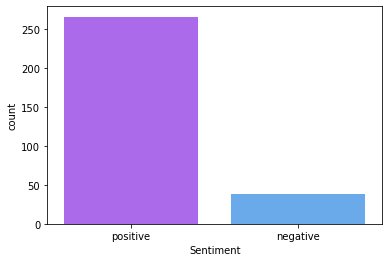

In [14]:
sns.countplot(reviews1.Sentiment,palette='cool_r') 

In [15]:
reviews1.loc[reviews1.Sentiment=='negative'].rating.value_counts() 
#There are some negative comments with 4  stars which is flawed
#Lets have a look at those values

4.0    38
Name: rating, dtype: int64

# Word Cloud

In [16]:
review_str = ' '.join(reviews1['title'].tolist()) 

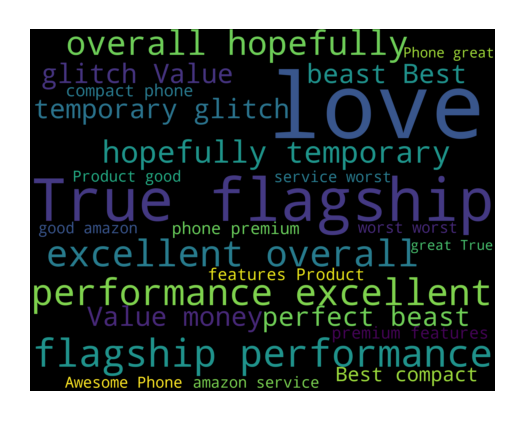

In [20]:
#Creating a WordCloud
from matplotlib.pyplot import figure
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,
               width=1800, height=1400).generate(review_str)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  

# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

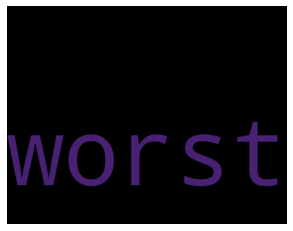

In [19]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in review_str.split() if w in negwords])
wordcloud_neg_in_neg = WordCloud(
                     background_color='black',
                     width=1800,
                     height=1400
                    ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

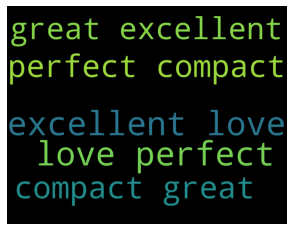

In [21]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in review_str.split() if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                     background_color='black',  width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

Conclusion:Perfomed Sentiment Analysis for a Samsung Phone.Cleaned data during preprocessing and removed stopwords.Developed word clouds for dataset and for positive and negative words.